## Decision Tree and Random forest

We will perform classification on the datasets using Decision Tree and Random Forest algorithms. 

The first dataset contains 2 features. The second dataset contains 50 features. Both of them have a target label which can be 0 or 1.

Steps involved - <br>
1 - Use a Decision Tree Classifier and observe the model performance.<br>
2 - Use a Random Forest Classifier and observe the model performance.<br>
3 - Use Grid Search to choose the optimal values for hyperparameters and observe the performance of the best model.


For the second dataset, an optimized Random Forest model will be generated.

Dataset 1:
train_2features.csv and test_2features.csv are the training set and testing set respecitvely.

Dataset 2:
train_50features.csv and test_50features.csv are the training set and testing set respecitvely.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import visualize_2d_data

# Dataset 1

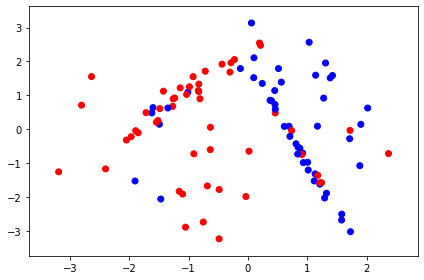

In [2]:
train_df = pd.read_csv("train_2features.csv")
f, ax = visualize_2d_data(train_df)

In [3]:
train_df.head()

,x1,x2,y
0,0.455178,0.727672,1
1,-0.303342,1.684185,0
2,-1.100127,-1.914980,0
3,1.129869,-1.319774,1
4,0.396403,0.836826,1


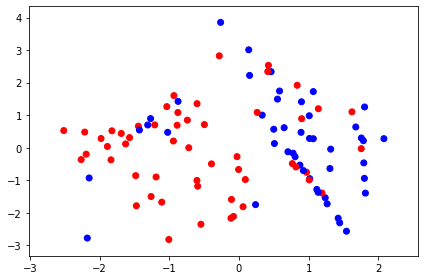

In [4]:
test_df = pd.read_csv("test_2features.csv")
f, ax = visualize_2d_data(test_df)

In [5]:
test_df.head()

,x1,x2,y
0,-1.260875,-1.496315,0
1,1.804029,1.253803,1
2,-1.627030,0.118947,0
3,-1.888437,0.040332,0
4,1.140222,1.199631,0


<U>Issues with linear methods</U> - Linear methods can only solve problems in which each class of data is linearly separable (usually via a hyperplane). However, if the problem isn't linearly separable i.e. data points of one class cannot be separated from another using a hyperplane, we need non-linear models. For example, a circular cluster of data point of one class surrounded by all other classes. The above visualizations aren't completely linear. Using a linear classifier would result in low accuracy.

### Decision Tree
From sklearn.tree we use DecisionTreeClassifier to build a classification model with default parameters.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [7]:
#Creating datasets required for training and testing

features_dataset1 = list(train_df.columns[:2])

#Train dataset
x_train_dataset1 = train_df.iloc[:,0:2]
y_train_dataset1 = train_df.iloc[:,2]

#Test dataset
x_test_dataset1 = test_df.iloc[:,0:2]
y_test_dataset1 = test_df.iloc[:,2]

In [8]:
### Fit the classifier on the training data
decision_tree_classifier = DecisionTreeClassifier(random_state=26)

decision_tree_classifier.fit(x_train_dataset1,y_train_dataset1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=26, splitter='best')

In [9]:
### Make predictions on the training data
y_train_dataset1_pred_class = decision_tree_classifier.predict(x_train_dataset1)

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [10]:
print("Training accuracy for dataset1 with DecisionTreeClassifier is:",accuracy_score(y_train_dataset1, y_train_dataset1_pred_class))
print("Training precision for dataset1 with DecisionTreeClassifier is:",precision_score(y_train_dataset1, y_train_dataset1_pred_class))
print("Training recall for dataset1 with DecisionTreeClassifier is:",recall_score(y_train_dataset1, y_train_dataset1_pred_class))

Training accuracy for dataset1 with DecisionTreeClassifier is: 1.0
Training precision for dataset1 with DecisionTreeClassifier is: 1.0
Training recall for dataset1 with DecisionTreeClassifier is: 1.0


In [11]:
### Make predictions on the testing data
y_test_dataset1_pred_class = decision_tree_classifier.predict(x_test_dataset1)

<b>Test dataset</b>

In [12]:
print("Test accuracy for dataset1 with DecisionTreeClassifier is:",accuracy_score(y_test_dataset1, y_test_dataset1_pred_class))
print("Test precision for dataset1 with DecisionTreeClassifier is:",precision_score(y_test_dataset1, y_test_dataset1_pred_class))
print("Test recall for dataset1 with DecisionTreeClassifier is:",recall_score(y_test_dataset1, y_test_dataset1_pred_class))

Test accuracy for dataset1 with DecisionTreeClassifier is: 0.69
Test precision for dataset1 with DecisionTreeClassifier is: 0.6818181818181818
Test recall for dataset1 with DecisionTreeClassifier is: 0.6382978723404256


Plot ROC curve and obtain AUC for test predictions

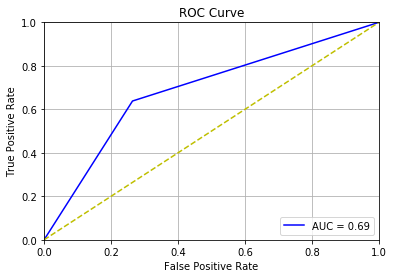

In [13]:
from sklearn.metrics import roc_curve,roc_auc_score
# Plot the ROC curve by giving appropriate names for title and axes. 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_test_dataset1_transformed = le.fit_transform(y_test_dataset1)
y_test_dataset1_pred_class_transformed = le.fit_transform(y_test_dataset1_pred_class)

# calculate the fpr and tpr for all thresholds of the classification
fpr = dict()
tpr = dict()

fpr, tpr, thresholds = roc_curve(y_test_dataset1_transformed, decision_tree_classifier.predict_proba(x_test_dataset1)[:,1], pos_label =1)

#Calculating AUC
auc_dataset1_classification = roc_auc_score(y_test_dataset1_transformed, decision_tree_classifier.predict_proba(x_test_dataset1)[:,1])

import matplotlib.pyplot as plt
# Plot the ROC curve by giving appropriate names for title and axes. 
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_dataset1_classification)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The above model performs really well on the training dataset but has low scores on the test dataset. This means that model has a low bias but high variance. The obtained model is overfitting the training dataset leading to lower performance overall.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 

From sklearn.ensemble we use RandomForestClassifier to build a classification model with default parameters.

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
### Fit the classifier on the training data
random_forest_classifier = RandomForestClassifier(random_state=26)
random_forest_classifier.fit(x_train_dataset1,y_train_dataset1)

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)

In [16]:
### Make predictions on the training data
y_train_dataset1_pred_rf = random_forest_classifier.predict(x_train_dataset1)

<b>Train dataset</b>

In [17]:
print("Training accuracy for dataset1 with RandomForestClassifier is:",accuracy_score(y_train_dataset1, y_train_dataset1_pred_rf))
print("Training precision for dataset1 with RandomForestClassifier is:",precision_score(y_train_dataset1, y_train_dataset1_pred_rf))
print("Training recall for dataset1 with RandomForestClassifier is:",recall_score(y_train_dataset1, y_train_dataset1_pred_rf))

Training accuracy for dataset1 with RandomForestClassifier is: 0.99
Training precision for dataset1 with RandomForestClassifier is: 1.0
Training recall for dataset1 with RandomForestClassifier is: 0.9795918367346939


In [18]:
### Make predictions on the testing data
y_test_dataset1_pred_rf = random_forest_classifier.predict(x_test_dataset1)


<b>Test dataset</b>

In [19]:
print("Test accuracy for dataset1 with RandomForestClassifier is:",accuracy_score(y_test_dataset1, y_test_dataset1_pred_rf))
print("Test precision for dataset1 with RandomForestClassifier is:",precision_score(y_test_dataset1, y_test_dataset1_pred_rf))
print("Test recall for dataset1 with RandomForestClassifier is:",recall_score(y_test_dataset1, y_test_dataset1_pred_rf))

Test accuracy for dataset1 with RandomForestClassifier is: 0.72
Test precision for dataset1 with RandomForestClassifier is: 0.7021276595744681
Test recall for dataset1 with RandomForestClassifier is: 0.7021276595744681


Plot ROC curve and obtain AUC for the test predictions

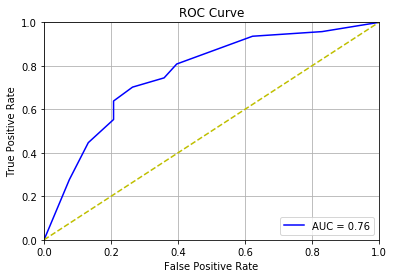

In [20]:
from sklearn.metrics import roc_curve,roc_auc_score
# Plot the ROC curve by giving appropriate names for title and axes. 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_test_dataset1_transformed = le.fit_transform(y_test_dataset1)
y_test_dataset1_pred_rf_transformed = le.fit_transform(y_test_dataset1_pred_rf)

# calculate the fpr and tpr for all thresholds of the classification
fpr = dict()
tpr = dict()

fpr, tpr, thresholds = roc_curve(y_test_dataset1_transformed, random_forest_classifier.predict_proba(x_test_dataset1)[:,1], pos_label =1)

#Calculating AUC
auc_dataset1_classification = roc_auc_score(y_test_dataset1_transformed, random_forest_classifier.predict_proba(x_test_dataset1)[:,1])

import matplotlib.pyplot as plt
# Plot the ROC curve by giving appropriate names for title and axes. 
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_dataset1_classification)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The above random forest model has improved performance comapred to the decision tree classifier since all three scores have improved overall. The model has sacrificed the bias to improve the variance resulting in overall increased scores on the test set.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
# Creating a dictionary with model parameters
param_grid_dataset1 = {
    'max_depth': [1,2],
    'max_features': [1,2],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [0.1,0.2,0.3],
    'n_estimators': [50, 100]
}

In [23]:
rf = RandomForestClassifier(random_state=26)

In [24]:
grid_search_dataset1 = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid_dataset1, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [25]:
### Fit the training data
grid_search_dataset1.fit(x_train_dataset1,y_train_dataset1)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    8.0s finished
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

Parameters of the best model.

In [26]:
best_parameters = grid_search_dataset1.best_params_
print(best_parameters)

{'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 0.1, 'n_estimators': 100}


In [27]:
best_result = grid_search_dataset1.best_score_
print(best_result)

0.8037478991596639


In [28]:
### Make predictions on the training set
y_train_dataset1_pred_gs1 = grid_search_dataset1.predict(x_train_dataset1)
print("Training accuracy for dataset1 with RandomForestClassifier is:",accuracy_score(y_train_dataset1, y_train_dataset1_pred_gs1))
print("Training precision for dataset1 with RandomForestClassifier is:",precision_score(y_train_dataset1, y_train_dataset1_pred_gs1))
print("Training recall for dataset1 with RandomForestClassifier is:",recall_score(y_train_dataset1, y_train_dataset1_pred_gs1))

Training accuracy for dataset1 with RandomForestClassifier is: 0.82
Training precision for dataset1 with RandomForestClassifier is: 0.803921568627451
Training recall for dataset1 with RandomForestClassifier is: 0.8367346938775511


In [29]:
### Make predictions on the testing set
y_test_dataset1_pred_gs1 = grid_search_dataset1.predict(x_test_dataset1)
print("Test accuracy for dataset1 with RandomForestClassifier is:",accuracy_score(y_test_dataset1, y_test_dataset1_pred_gs1))
print("Test precision for dataset1 with RandomForestClassifier is:",precision_score(y_test_dataset1, y_test_dataset1_pred_gs1))
print("Test recall for dataset1 with RandomForestClassifier is:",recall_score(y_test_dataset1, y_test_dataset1_pred_gs1))

Test accuracy for dataset1 with RandomForestClassifier is: 0.77
Test precision for dataset1 with RandomForestClassifier is: 0.7222222222222222
Test recall for dataset1 with RandomForestClassifier is: 0.8297872340425532


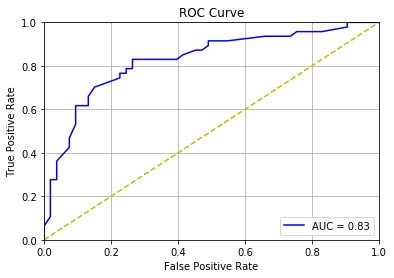

In [30]:
#Plot ROC curve and print AUC.
from sklearn.metrics import roc_curve,roc_auc_score
# Plot the ROC curve by giving appropriate names for title and axes. 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_test_dataset1_transformed = le.fit_transform(y_test_dataset1)
y_test_dataset1_pred_rf_transformed = le.fit_transform(y_test_dataset1_pred_gs1)

# calculate the fpr and tpr for all thresholds of the classification
fpr = dict()
tpr = dict()

fpr, tpr, thresholds = roc_curve(y_test_dataset1_transformed, grid_search_dataset1.predict_proba(x_test_dataset1)[:,1], pos_label =1)

#Calculating AUC
auc_dataset1_classification = roc_auc_score(y_test_dataset1_transformed, grid_search_dataset1.predict_proba(x_test_dataset1)[:,1])

import matplotlib.pyplot as plt
# Plot the ROC curve by giving appropriate names for title and axes. 
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_dataset1_classification)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Performing grid search has increased the overall performance of the model resulting in higher AUC values. Yes, we were able to optimize the hyperparameters.

# Dataset 2

Given this procedure, we want to optimize a random forest classifier for a dataset with 50 features. Training data are provided, but testing data does not include the labels. It is up to you to use the training data to optimize generalization performance to the test data.

In [31]:
train_data = pd.read_csv("train_50features.csv")
test_data = pd.read_csv("test_50features.csv")

#Train dataset
x_train_dataset2 = train_data.iloc[:,0:50]
y_train_dataset2 = train_data.iloc[:,50]

#Test dataset
x_test_dataset2 = test_data.iloc[:,0:50]

In [32]:
max_features = [int(x) for x in np.linspace(10, 50, num = 5)]
#max_features.append(None)
max_features.append("auto")
max_features.append("sqrt")
max_features.append("log2")
print(max_features)

[10, 20, 30, 40, 50, 'auto', 'sqrt', 'log2']


In [33]:
param_grid_dataset2_1 = {
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_leaf': [1,3,5,7,9],
    'min_samples_split': [2,5,10,15],
    'n_estimators': [500, 700, 900, 1000]
}

rf = RandomForestClassifier(random_state=26)

grid_search_dataset2_1 = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid_dataset2_1, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [34]:
grid_search_dataset2_1.fit(x_train_dataset2,y_train_dataset2)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  7.9min finished
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  Depr

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [35]:
best_parameters = grid_search_dataset2_1.best_params_
print(best_parameters)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 500}


In [36]:
y_train_dataset2_pred_gs1 = grid_search_dataset2_1.predict(x_train_dataset2)
print("Training accuracy for dataset1 with RandomForestClassifier is:",accuracy_score(y_train_dataset2, y_train_dataset2_pred_gs1))
print("Training precision for dataset1 with RandomForestClassifier is:",precision_score(y_train_dataset2, y_train_dataset2_pred_gs1))
print("Training recall for dataset1 with RandomForestClassifier is:",recall_score(y_train_dataset2, y_train_dataset2_pred_gs1))

Training accuracy for dataset1 with RandomForestClassifier is: 0.97
Training precision for dataset1 with RandomForestClassifier is: 0.9454545454545454
Training recall for dataset1 with RandomForestClassifier is: 1.0


In [37]:
param_grid_dataset2_2 = {
    'max_depth': [5, 10, 20, 30, 40, 50],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_leaf': [5,7,9,15,20],
    'min_samples_split': [2,5,10,15],
    'n_estimators': [450, 500, 550, 600, 900]
}

rf = RandomForestClassifier(random_state=26)

grid_search_dataset2_2 = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid_dataset2_2, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [38]:
grid_search_dataset2_2.fit(x_train_dataset2,y_train_dataset2)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  8.8min finished
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [39]:
best_parameters = grid_search_dataset2_2.best_params_
print(best_parameters)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 900}


In [40]:
y_train_dataset2_pred_gs2 = grid_search_dataset2_2.predict(x_train_dataset2)
print("Training accuracy for dataset1 with RandomForestClassifier is:",accuracy_score(y_train_dataset2, y_train_dataset2_pred_gs2))
print("Training precision for dataset1 with RandomForestClassifier is:",precision_score(y_train_dataset2, y_train_dataset2_pred_gs2))
print("Training recall for dataset1 with RandomForestClassifier is:",recall_score(y_train_dataset2, y_train_dataset2_pred_gs2))

Training accuracy for dataset1 with RandomForestClassifier is: 0.92
Training precision for dataset1 with RandomForestClassifier is: 0.8928571428571429
Training recall for dataset1 with RandomForestClassifier is: 0.9615384615384616


In [41]:
param_grid_dataset2_3 = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_leaf': [5,7,9,15,20],
    'min_samples_split': [5,10,15,20,25],
    'n_estimators': [500, 550, 600, 900, 1100]
}

rf = RandomForestClassifier(random_state=26)

grid_search_dataset2_3 = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid_dataset2_3, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [42]:
grid_search_dataset2_3.fit(x_train_dataset2,y_train_dataset2)

Fitting 3 folds for each of 2250 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 6750 out of 6750 | elapsed: 17.5min finished
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWar

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [43]:
best_parameters = grid_search_dataset2_3.best_params_
print(best_parameters)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 900}


In [44]:
y_train_dataset2_pred_gs3 = grid_search_dataset2_3.predict(x_train_dataset2)
print("Training accuracy for dataset1 with RandomForestClassifier is:",accuracy_score(y_train_dataset2, y_train_dataset2_pred_gs3))
print("Training precision for dataset1 with RandomForestClassifier is:",precision_score(y_train_dataset2, y_train_dataset2_pred_gs3))
print("Training recall for dataset1 with RandomForestClassifier is:",recall_score(y_train_dataset2, y_train_dataset2_pred_gs3))

Training accuracy for dataset1 with RandomForestClassifier is: 0.92
Training precision for dataset1 with RandomForestClassifier is: 0.8928571428571429
Training recall for dataset1 with RandomForestClassifier is: 0.9615384615384616


**Checking AUC values by variying each parameter to obtain optimum values**

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

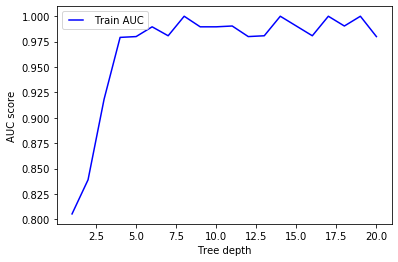

In [45]:
#Checking errors with max_depth

from sklearn.metrics import roc_curve, auc

max_depths = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(x_train_dataset2, y_train_dataset2)   
    train_pred = rf.predict(x_train_dataset2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dataset2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

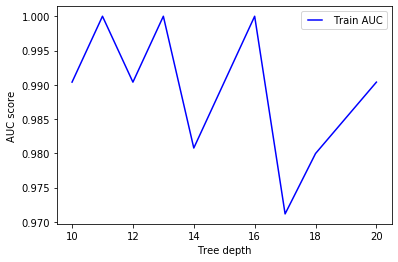

In [46]:
#Checking errors with max_depth
#Narrowing the range to get a better view
from sklearn.metrics import roc_curve, auc

max_depths = [int(x) for x in np.linspace(start = 10, stop = 20, num = 10)]
train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(x_train_dataset2, y_train_dataset2)   
    train_pred = rf.predict(x_train_dataset2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dataset2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

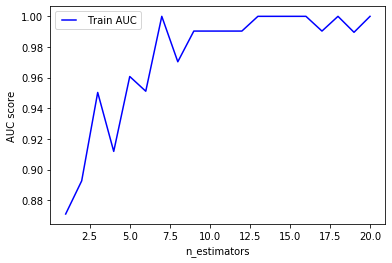

In [47]:
#Checking errors with n_estimators

from sklearn.metrics import roc_curve, auc

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]

train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train_dataset2, y_train_dataset2)   
    train_pred = rf.predict(x_train_dataset2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dataset2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

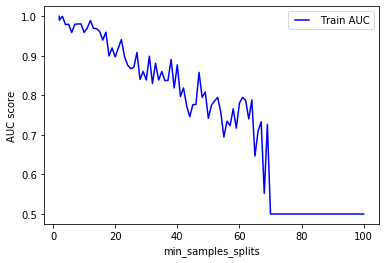

In [48]:
#Checking errors with min_sample_splits

from sklearn.metrics import roc_curve, auc

min_sample_splits = [int(x) for x in np.linspace(start = 2, stop = 100, num = 100)]

train_results = []
test_results = []

for min_samples_split in min_sample_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
    rf.fit(x_train_dataset2, y_train_dataset2)   
    train_pred = rf.predict(x_train_dataset2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dataset2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_sample_splits, train_results, 'b', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

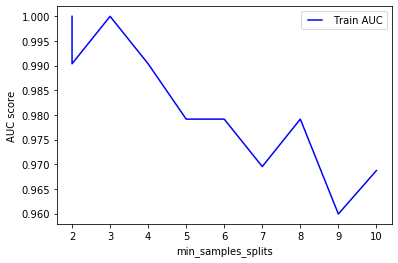

In [49]:
#Checking errors with min_sample_splits
#Narrowing the range to get a better view
from sklearn.metrics import roc_curve, auc

min_sample_splits = [int(x) for x in np.linspace(start = 2, stop = 10, num = 10)]

train_results = []
test_results = []

for min_samples_split in min_sample_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
    rf.fit(x_train_dataset2, y_train_dataset2)   
    train_pred = rf.predict(x_train_dataset2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dataset2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_sample_splits, train_results, 'b', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

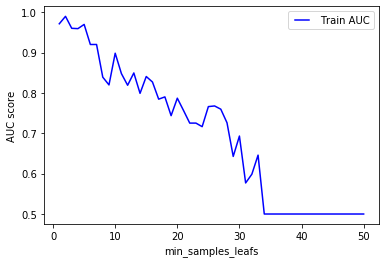

In [50]:
#Checking errors with min_samples_leafs

from sklearn.metrics import roc_curve, auc

min_samples_leafs = [int(x) for x in np.linspace(start = 1, stop = 50, num = 50)]

train_results = []
test_results = []

for min_sample_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_sample_leaf, n_jobs=-1)
    rf.fit(x_train_dataset2, y_train_dataset2)   
    train_pred = rf.predict(x_train_dataset2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dataset2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

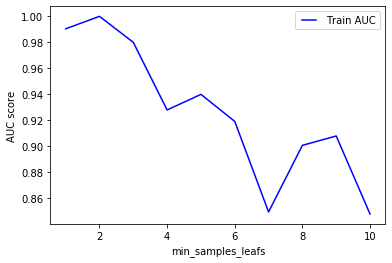

In [51]:
#Checking errors with min_samples_leafs
#Narrowing the range to get a better view
from sklearn.metrics import roc_curve, auc

min_samples_leafs = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

train_results = []
test_results = []

for min_sample_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_sample_leaf, n_jobs=-1)
    rf.fit(x_train_dataset2, y_train_dataset2)   
    train_pred = rf.predict(x_train_dataset2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dataset2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

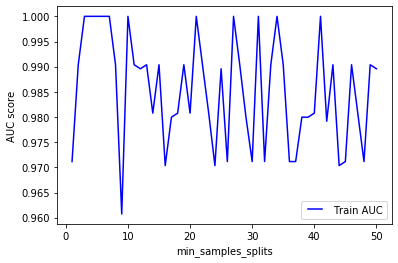

In [52]:
#Checking errors with max_features

from sklearn.metrics import roc_curve, auc

max_features = [int(x) for x in np.linspace(start = 1, stop = 50, num = 50)]

train_results = []
test_results = []

for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    rf.fit(x_train_dataset2, y_train_dataset2)   
    train_pred = rf.predict(x_train_dataset2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dataset2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest

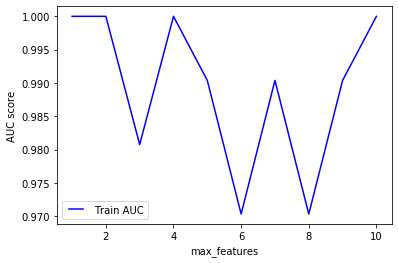

In [53]:
#Checking the model performance with max_features

from sklearn.metrics import roc_curve, auc

max_features = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

train_results = []
test_results = []

for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    rf.fit(x_train_dataset2, y_train_dataset2)   
    train_pred = rf.predict(x_train_dataset2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dataset2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

In [54]:
param_grid_dataset2_4 = {
    'max_depth': [8,11,15,18,20],
    'max_features': [3,6,8,10],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,5,7,9],
    'n_estimators': [5,7,8,9,12,15]
}

rf = RandomForestClassifier(random_state=26)

grid_search_dataset2_4 = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid_dataset2_4, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [55]:
grid_search_dataset2_4.fit(x_train_dataset2,y_train_dataset2)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2076 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    9.1s finished
C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [56]:
best_parameters = grid_search_dataset2_4.best_params_
print(best_parameters)

{'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 15}


In [57]:
y_train_dataset2_pred_gs4 = grid_search_dataset2_4.predict(x_train_dataset2)
print("Training accuracy for dataset1 with RandomForestClassifier is:",accuracy_score(y_train_dataset2, y_train_dataset2_pred_gs4))
print("Training precision for dataset1 with RandomForestClassifier is:",precision_score(y_train_dataset2, y_train_dataset2_pred_gs4))
print("Training recall for dataset1 with RandomForestClassifier is:",recall_score(y_train_dataset2, y_train_dataset2_pred_gs4))

Training accuracy for dataset1 with RandomForestClassifier is: 0.98
Training precision for dataset1 with RandomForestClassifier is: 0.9807692307692307
Training recall for dataset1 with RandomForestClassifier is: 0.9807692307692307


In [58]:
#Predicting the test dataset
y_test_dataset2_pred_gs = grid_search_dataset2_4.predict(x_test_dataset2)

In [59]:
#Exporting the results
predicted = pd.DataFrame(y_test_dataset2_pred_gs, columns = ['y'])
predicted.to_csv('result.csv', index = False)

<b>Reason for choosing the ranges</b>

Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations evaluate the performance of each model. However, evaluating each model only on the training set can lead to overfitting. One way to optimize selection of parameters is by plotting AUC values with variations of each of the parameters and check which value of the parameter gives us the maximum AUC. We can then choose all such values of the parameters and then perform a grid search on them to get the optimized grid. The best result from this would be the best model. Some of the important points to remember while optimizing the individual parameters is<br>
- n_estimators - The number of trees in the forest.Random forest models are ensembles of decision trees and we can define the number of decision trees in the forest. Additional decision trees typically improve model accuracy because predictions are made based on a larger number of “votes” from diverse trees, however, large numbers of trees are computationally expensive. <br>
- max_depth - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves 
contain less than min_samples_split samples. Each tree in the random forest model makes multiple splits to isolate homogeneous groups of outcomes. Larger numbers of splits allowed in each tree enables the trees to explain more variation in the data, however, trees with many splits may overfit the data. A range of depth values should be evaluated, including “None” where trees are split until all the leaves are pure.<br>
- min_samples_split - The minimum number of samples required to split an internal node. We can control the minimum number of samples required to split each node. Values too large may cause under-fitting, as the trees won’t be able to split enough times to achieve node purity. This hyperparameter should be based on the number of records in the training dataset.<br>
- min_samples_leaf - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- max_features - The number of features to consider when looking for the best split.Random forest models randomly resample features prior to determining the best split. Max_features determines the number of features to resample. Larger max_feature values can result in improved model performance because trees have a larger selection of features from which choose the best split, but can also cause trees to be less diverse and induce overfitting.